In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
videos=pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [3]:
tags_complete= (' '.join(videos['tags']))
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags=re.sub(' +',' ',tags)

(-0.5, 999.5, 499.5, -0.5)

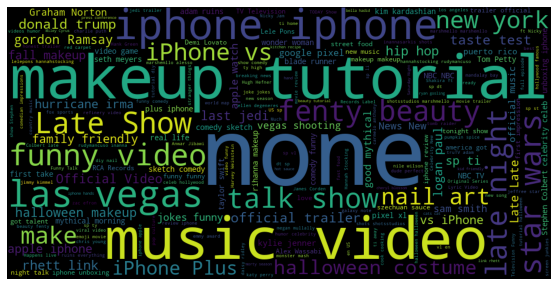

In [4]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for likes & views')

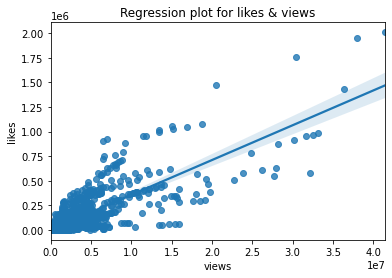

In [5]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for likes & views")

Text(0.5, 1.0, 'Regression plot for dislikes & views')

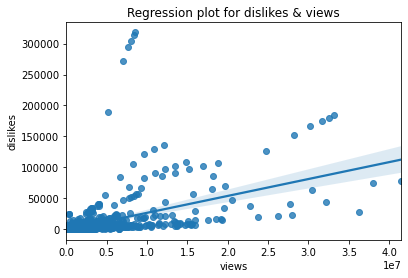

In [6]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot for dislikes & views")

<AxesSubplot:>

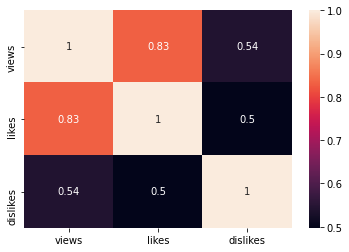

In [7]:
df_corr = videos[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

In [8]:
comments=pd.read_csv('UScomments.csv',error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\anaconda3\envs\sc\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
polarity=[]
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [10]:
comments['polarity']=polarity

In [11]:
comments_positive = comments[comments['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [12]:
total_comments_positive=(''.join(comments_positive['comment_text']))
len(total_comments_positive)

827171

In [13]:
stopwords=set(STOPWORDS)

(-0.5, 999.5, 499.5, -0.5)

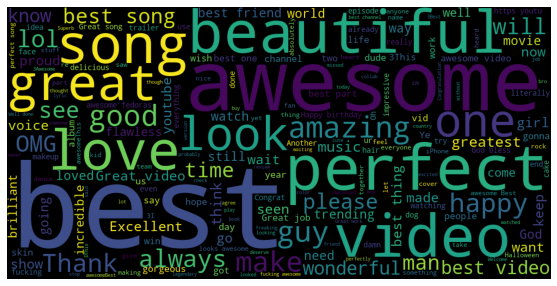

In [14]:
total_comments= (' '.join(comments_positive['comment_text']))
wordCloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_comments_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud)
plt.axis('off')

In [15]:
comments_negative = comments[comments['polarity']==-1]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [16]:
total_comments_negative=(''.join(comments_negative['comment_text']))
len(total_comments_negative)

187280

(-0.5, 999.5, 499.5, -0.5)

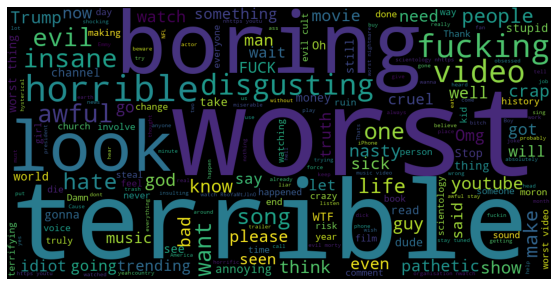

In [17]:
total_comments= (' '.join(comments_negative['comment_text']))
wordCloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud)
plt.axis('off')